<a href="https://colab.research.google.com/github/Methun18/oibsip_taskno/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
ds=pd.read_csv("/content/retail_sales_dataset.csv")
ds

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
ds.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Data Cleaning

In [ ]:
ds.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
ds.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
ds['Total Amount'].mean()

456.0

In [ ]:
ds['Total Amount'].median()

135.0

In [ ]:
ds['Total Amount'].mode()

,Total Amount
0,50


In [ ]:
ds['Total Amount'].std()

559.997631555123

# Time Series Analysis

In [ ]:
ds['Date'] = pd.to_datetime(ds['Date'])

In [ ]:
ds.set_index('Date', inplace=True)

In [ ]:
monthly_sales = ds['Total Amount'].resample('M').sum()

<ipython-input-33-00e8e18c4e15>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ds['Total Amount'].resample('M').sum()


In [ ]:
import matplotlib.pyplot as plt


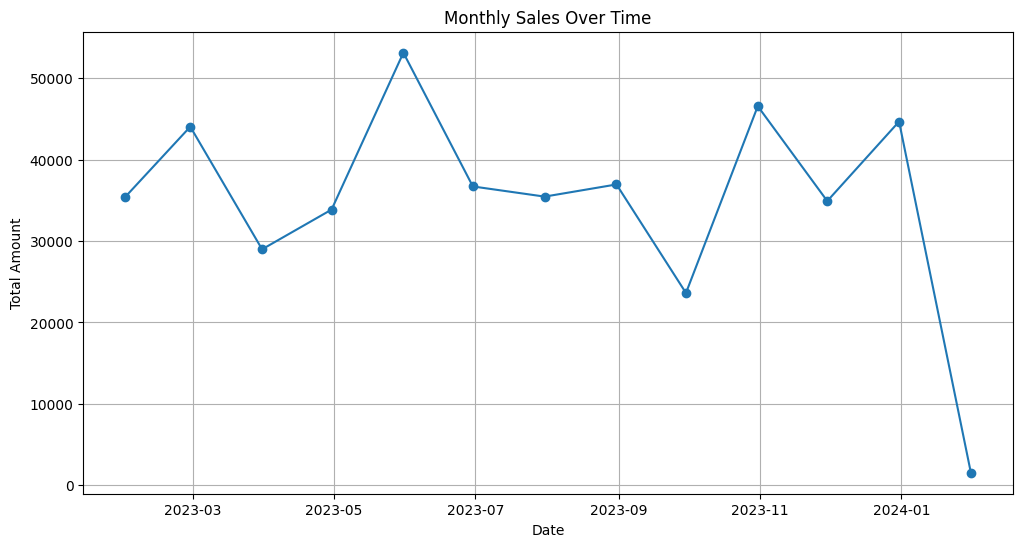

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid()
plt.show()

# Customer and Product Analysis

In [ ]:

customer_analysis = ds.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).sort_values(by='Total Amount', ascending=False)


print(customer_analysis.head(10))

             Total Amount  Quantity
Customer ID                        
CUST487              2000         4
CUST476              2000         4
CUST773              2000         4
CUST503              2000         4
CUST093              2000         4
CUST089              2000         4
CUST946              2000         4
CUST157              2000         4
CUST155              2000         4
CUST420              2000         4


In [ ]:
product_analysis = ds.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).sort_values(by='Total Amount', ascending=False)

print(product_analysis)

                  Total Amount  Quantity
Product Category                        
Electronics             156905       849
Clothing                155580       894
Beauty                  143515       771


# Visualization

In [ ]:
import seaborn as sns

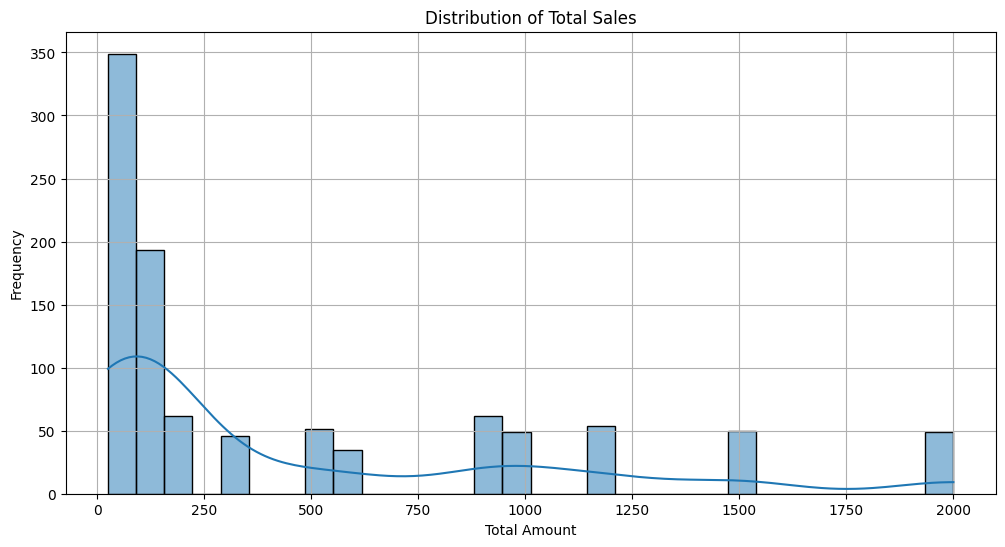

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(ds['Total Amount'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()


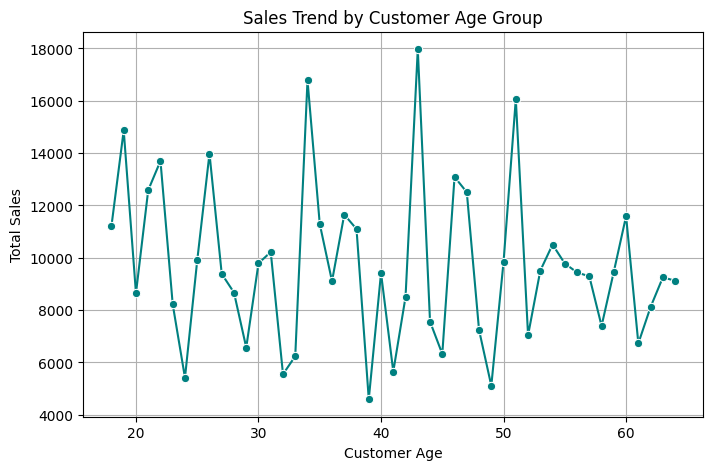

In [ ]:
age_sales = ds.groupby('Age')['Total Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=age_sales, x='Age', y='Total Amount', marker='o', color='teal')
plt.title('Sales Trend by Customer Age Group')
plt.xlabel('Customer Age')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<ipython-input-51-5d54cafa3da9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')


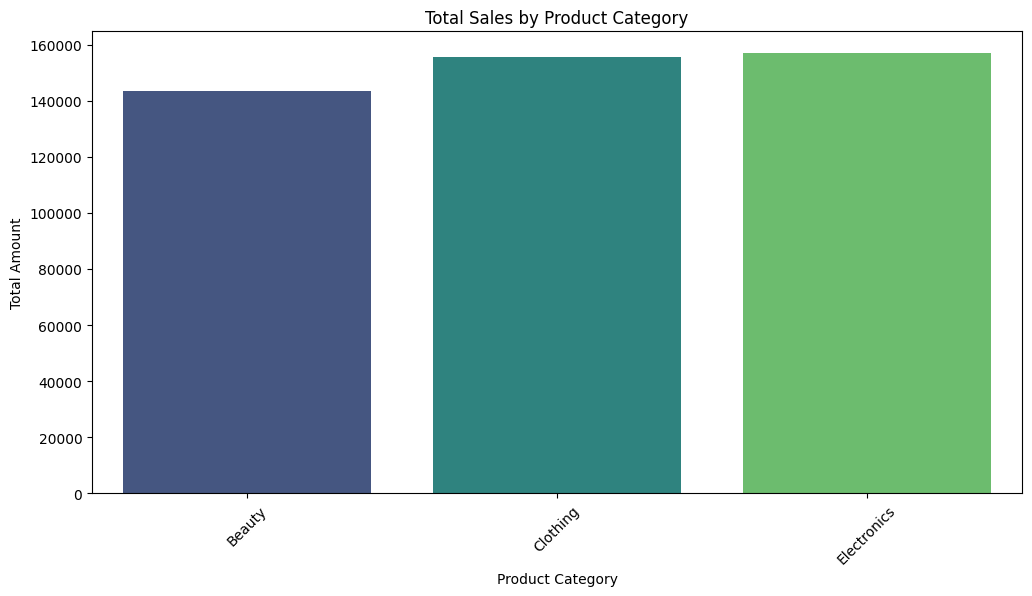

In [ ]:
plt.figure(figsize=(12, 6))
sales_by_category = ds.groupby('Product Category')['Total Amount'].sum().sort_values()
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.show()


<ipython-input-56-8b73953d123d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='crest')


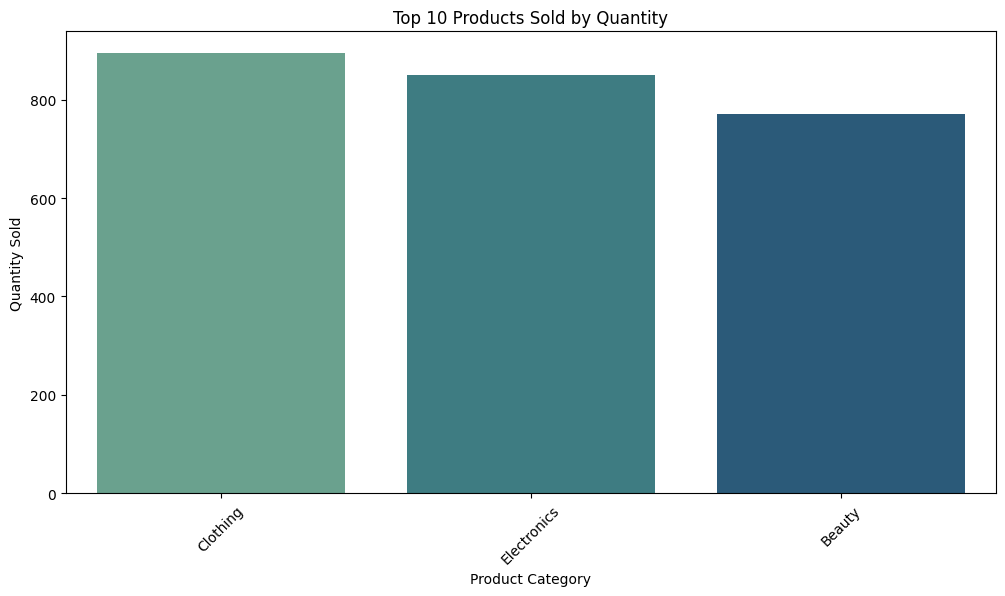

In [ ]:
plt.figure(figsize=(12, 6))
top_products = ds.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.index, y=top_products.values, palette='crest')
plt.title('Top 10 Products Sold by Quantity')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')
plt.show()


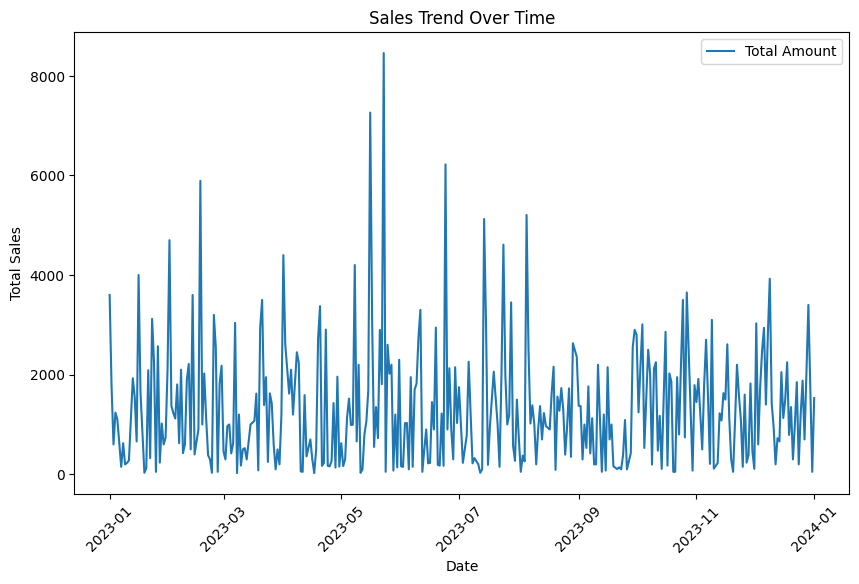

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ds_time_series['Date'], ds_time_series['Total Amount'], label='Total Amount')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()


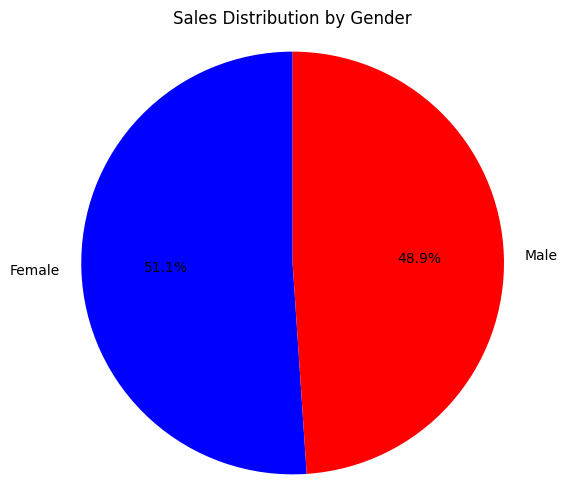

In [ ]:

gender_sales = ds.groupby('Gender')['Total Amount'].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(gender_sales['Total Amount'], labels=gender_sales['Gender'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Sales Distribution by Gender')
plt.axis('equal')
plt.show()

# Recommendations

In [ ]:

recommendations = [
    "Focus marketing efforts on top 10 customers to enhance loyalty.",
    "Consider promotions for the most popular product categories.",
    "Analyze underperforming products and assess the need for discounts or bundling.",
    "Implement a seasonal sales strategy based on time series insights."
]

for rec in recommendations:
    print("- " + rec)


- Focus marketing efforts on top 10 customers to enhance loyalty.
- Consider promotions for the most popular product categories.
- Analyze underperforming products and assess the need for discounts or bundling.
- Implement a seasonal sales strategy based on time series insights.
